# Title

Author: Sandra Godinho Silva \
Most updated version: 0.1 (1/01/2021)

## Purpose
State the purpose of the notebook.

## Methodology
Quickly describe assumptions and processing steps.

## WIP - improvements
Use this section only if the notebook is not final.

Notable TODOs:
- todo 1;
- todo 2;
- todo 3.

## Results
Describe and comment the most important results.

## Suggested next steps
State suggested next steps, based on results obtained in this notebook.

# Setup

## Library import
We import all the required Python libraries

In [29]:
# Data manipulation
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style(style='darkgrid')


# Options for pandas
pd.options.display.max_columns = 50
pd.options.display.max_rows = 30

import matplotlib as plt

# Autoreload extension
if 'autoreload' not in get_ipython().extension_manager.loaded:
    %load_ext autoreload
    
%autoreload 2

In [3]:
# Include local library paths
import sys

In [44]:
import numpy as np
from sklearn import model_selection

from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.preprocessing import label_binarize

from sklearn.feature_selection import RFECV, VarianceThreshold

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import StratifiedKFold,  GridSearchCV
from sklearn.model_selection import StratifiedShuffleSplit

from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import roc_auc_score, matthews_corrcoef, precision_score, recall_score, f1_score
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

from sklearn.linear_model import LogisticRegression

import numpy as np

from sklearn.svm import SVC

from sklearn.multiclass import OneVsRestClassifier

In [9]:
random_state = 42


# Data import
We retrieve all the required data for the analysis.

In [5]:
df = pd.read_csv("cog_genus_counts.csv", index_col=0)
df.head()

,COG1943,COG0756,COG1209,COG4942,COG1305,COG2307,COG2308,COG0726,COG2010,COG2133,COG2207,COG1082,COG0596,COG5485,COG2318,COG1733,COG1359,COG1472,COG2220,COG0366,COG1764,COG0583,COG3598,COG0484,COG1396,...,COG4034,COG4991,COG3115,COG3426,COG2039,COG3722,COG5036,COG4955,COG4133,COG2164,COG1513,COG3504,COG5405,COG1790,COG3356,COG3603,COG5324,COG3981,COG3431,COG3334,COG3635,COG3692,COG4691,COG4246,Genus
Assembly accession,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
GCA_000218485.2,3,1,2,1,3,1,2,1,3,3,14,0,8,0,1,3,0,3,0,0,1,4,0,3,1,...,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,Aquimarina
GCA_000255455.1,1,1,3,1,1,0,0,0,1,1,20,1,8,0,1,1,1,4,0,5,1,3,0,2,5,...,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,Aquimarina
GCA_000430545.1,2,1,2,1,1,0,0,1,2,0,31,0,13,0,0,3,4,1,1,0,1,7,0,3,4,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Tenacibaculum
GCA_000430645.1,1,1,3,1,1,0,0,5,2,2,73,2,19,0,1,4,2,7,6,10,0,4,0,2,2,...,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Aquimarina
GCA_000430665.1,2,1,2,1,2,0,0,2,2,0,30,0,12,0,1,4,0,3,5,5,1,4,0,4,5,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Aquimarina


# Data processing
Put here the core of the notebook. Feel free to further split this section into subsections.

In [6]:
category= "Genus"
y = df.pop(category).values

In [10]:
X_model, X_valid, y_model, y_valid = train_test_split(df, y, random_state=random_state, test_size=.8)

In [11]:
estimator_dict = {}
importance_fatures_sorted_all = pd.DataFrame()

In [14]:
model_dict = {'LogisticRegression': LogisticRegression(penalty='l1', solver='saga', C=2, multi_class='multinomial', n_jobs=-1, random_state=random_state)
             , 'ExtraTreesClassifier': ExtraTreesClassifier(n_estimators=200, max_depth=3, min_samples_leaf=.06, n_jobs=-1, random_state=random_state)
              , 'RandomForestClassifier': RandomForestClassifier(n_estimators=20, max_depth=5, min_samples_leaf=.1, random_state=random_state, n_jobs=-1)
             }

========== LogisticRegression ==========
Accuracy in training: 1.0
Accuracy in valid: 0.9883720930232558
Show top 10 important features:


/home/sandra/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


,feature_importance,ranking
COG0642,0.051048,1.0
COG1629,0.030005,2.0
COG0526,0.024275,3.0
COG1680,0.023431,4.0
COG2207,0.023199,5.0
COG0810,0.021624,6.0
COG0664,0.018543,7.0
COG0784,0.018111,8.0
COG0564,0.016296,9.0
COG3000,0.015428,10.0


========== ExtraTreesClassifier ==========
Accuracy in training: 1.0
Accuracy in valid: 0.9883720930232558
Show top 10 important features:


,feature_importance,ranking
COG0219,0.036875,1.0
COG1001,0.030000,2.0
COG1360,0.023440,3.0
COG5642,0.023037,4.0
COG3001,0.022773,5.0
COG3396,0.020720,6.0
COG1876,0.020216,7.0
COG2021,0.020000,8.5
COG0566,0.020000,8.5
COG3225,0.018720,10.0


========== RandomForestClassifier ==========
Accuracy in training: 1.0
Accuracy in valid: 0.9767441860465116
Show top 10 important features:


,feature_importance,ranking
COG0564,0.10,1.0
COG0457,0.05,7.5
COG0431,0.05,7.5
COG3007,0.05,7.5
COG1876,0.05,7.5
COG1544,0.05,7.5
COG2271,0.05,7.5
COG3832,0.05,7.5
COG4665,0.05,7.5
COG1001,0.05,7.5


CPU times: user 8.45 s, sys: 112 ms, total: 8.56 s
Wall time: 7.45 s


Text(0.5, 0, 'Number of features selected')

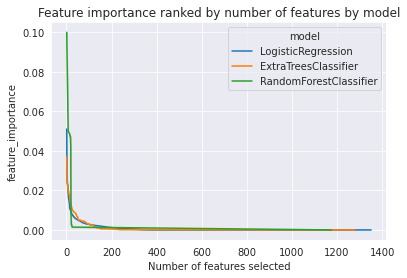

In [36]:
%%time
for model_name, model in model_dict.items():
    print('='*10, model_name, '='*10)
    
    model.fit(X_model, y_model)
    print('Accuracy in training:', accuracy_score(model.predict(X_model), y_model))
    print('Accuracy in valid:', accuracy_score(model.predict(X_valid), y_valid))
    
    importance_values = np.absolute(model.coef_) if model_name == 'LogisticRegression' else model.feature_importances_
    importance_fatures_sorted = pd.DataFrame(importance_values.reshape([-1, len(df.columns)]), columns=df.columns).mean(axis=0).sort_values(ascending=False).to_frame()
    importance_fatures_sorted.rename(columns={0: 'feature_importance'}, inplace=True)
    importance_fatures_sorted['ranking']= importance_fatures_sorted['feature_importance'].rank(ascending=False)
    importance_fatures_sorted['model'] = model_name
    print('Show top 10 important features:')
    display(importance_fatures_sorted.drop('model', axis=1).head(10))
    importance_fatures_sorted_all = importance_fatures_sorted_all.append(importance_fatures_sorted)
    estimator_dict[model_name] = model
import matplotlib.pyplot as plt

plt.title('Feature importance ranked by number of features by model')
sns.lineplot(data=importance_fatures_sorted_all, x='ranking', y='feature_importance', hue='model')
plt.xlabel("Number of features selected")


In [38]:
# Get selected features
selected_model = 'LogisticRegression'
number_of_features = 60
select_features_by_model = importance_fatures_sorted_all[importance_fatures_sorted_all['model'] == selected_model].index[:number_of_features].tolist()

/home/sandra/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/home/sandra/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/home/sandra/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/home/sandra/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/home/sandra/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarn

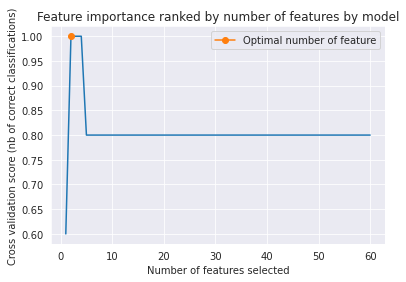

CPU times: user 404 ms, sys: 109 ms, total: 512 ms
Wall time: 1.12 s


In [48]:
%%time
#it takes much more time comparing 
rfecv = RFECV(estimator=model_dict['LogisticRegression'].set_params(max_iter=150, C=1), step=1, cv=StratifiedShuffleSplit(1, test_size=.2, random_state=random_state), scoring='accuracy', n_jobs=-1)
rfecv.fit(X_model[select_features_by_model], y_model)
plt.figure()
plt.title('Feature importance ranked by number of features by model')
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (nb of correct classifications)")
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_)
plt.plot(rfecv.n_features_, rfecv.grid_scores_[rfecv.n_features_-1], marker='o', label='Optimal number of feature')
plt.legend(loc='best')
plt.show()